In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#!/usr/bin/env python
# coding: utf-8


In [30]:
#For data processing
import pandas as pd
import numpy as np
import datetime as dt

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For models
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop, SGD, Adam
import preprocessing 
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [69]:
df =  pd.read_csv("data\stock.csv")

In [70]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
979,2017-12-22,914.650024,922.400024,909.299988,920.400024,906.417603,4872675
980,2017-12-26,924.849976,938.900024,918.150024,929.799988,915.674683,5301456
981,2017-12-27,933.000000,937.500000,919.000000,923.750000,909.716675,4352384
982,2017-12-28,925.250000,934.400024,919.099976,924.200012,910.159851,7091515
983,2017-12-29,926.500000,932.299988,918.500000,921.049988,907.057678,5069838


In [71]:
#creating test, train and validate trains
train_size = int(df.shape[0] * 0.80)
test_size = int(df.shape[0] * 0.20)

In [72]:
train_set = df.iloc[0:train_size, 1:2].values
test_set = df.iloc[train_size:, 1:2].values

In [73]:
print(train_set.shape, test_set.shape)

(787, 1) (197, 1)


In [74]:
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)

In [75]:
#Creating a data structure with given time_steps (=5) and 1 output
# build the input features with time lag of 2 day (lag =2):

time_step = 5
lag = 2
X_train = []
y_train = []


for i in range(5,len(train_set)):
    X_train.append(train_set_scaled[i-(time_step-lag):i, 0])
    y_train.append(train_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(782, 3) (782,)


In [76]:
#reshape X_train to 3D array of dim sample size, time step, feature
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(782, 3, 1)


In [77]:
# return validation data
def get_val():
	seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y

In [78]:
from numpy import array
valX, valY = get_val()

In [79]:
#build model
#build model

model = Sequential()

model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units = 1)) #output layer
model.add(Activation('relu'))

import time #helper libraries
start = time.time()
#opt = RMSprop(lr=0.01, momentum=0.0)
opt = RMSprop()
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
print ('compilation time : ', time.time() - start)

compilation time :  0.009999990463256836


In [80]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data=(valX, valY), shuffle=False)

Epoch 1/15
25/25 [==============================] - 1s 57ms/step - loss: 0.0117 - mean_absolute_error: 0.0773 - val_loss: 0.4221 - val_mean_absolute_error: 0.6378
Epoch 2/15
25/25 [==============================] - 0s 12ms/step - loss: 0.0069 - mean_absolute_error: 0.0606 - val_loss: 0.4296 - val_mean_absolute_error: 0.6441
Epoch 3/15
25/25 [==============================] - 0s 12ms/step - loss: 0.0049 - mean_absolute_error: 0.0515 - val_loss: 0.4323 - val_mean_absolute_error: 0.6466
Epoch 4/15
25/25 [==============================] - 0s 13ms/step - loss: 0.0047 - mean_absolute_error: 0.0503 - val_loss: 0.4404 - val_mean_absolute_error: 0.6529
Epoch 5/15
25/25 [==============================] - 0s 12ms/step - loss: 0.0036 - mean_absolute_error: 0.0454 - val_loss: 0.4373 - val_mean_absolute_error: 0.6507
Epoch 6/15
25/25 [==============================] - 0s 13ms/step - loss: 0.0037 - mean_absolute_error: 0.0445 - val_loss: 0.4380 - val_mean_absolute_error: 0.6513
Epoch 7/15
25/25 [====

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 3, 128)            66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 128)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
________________________________________________

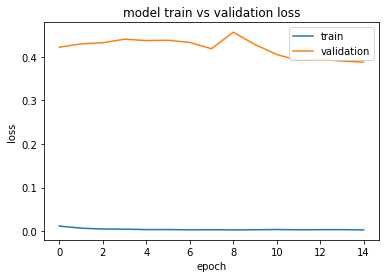

In [82]:
# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#if validation loss is high and no downward trend, its an underfit model. Try inc the capacity - input layers, hidden cells, etc.
#if validation loss is high and has a trend, its an underfit model. Try inc the num of epochs
# if validation loss is merging with train loss, its a ideal fit.
# if both have merged and running parallel, try increasing the smaple size.


In [58]:
pred_len = round(train_size*0.65)
pred_len

512

In [59]:
# Getting the predicted stock price of 
dataset_train = df.iloc[:pred_len, 1:2]
dataset_test = df.iloc[pred_len:, 1:2]
# dataset_train = df.iloc[:500, 1:2]
# dataset_test = df.iloc[500:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

#input should also have the same time_step as the model
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_step:].values



In [60]:
inputs.shape

(477, 1)

In [61]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_step, len(inputs)):
    X_test.append(inputs[i-(time_step-lag):i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(472, 3, 1)


In [62]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [63]:
predicted_stock_price.shape

(472, 1)

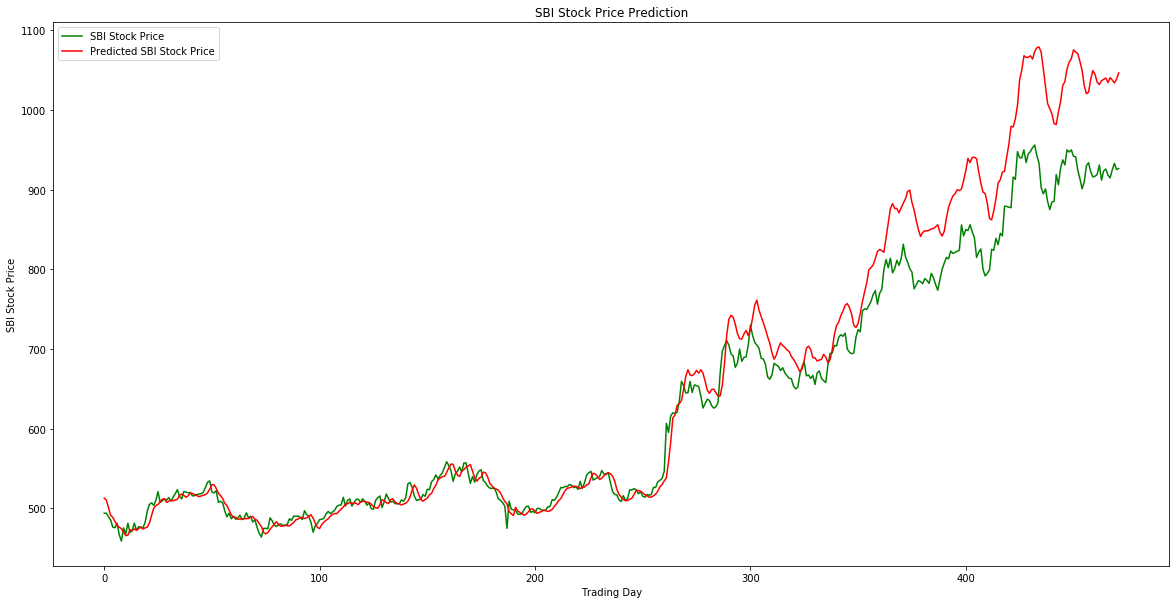

In [64]:
# Visualising the results

plt.figure(figsize=(20,10))
plt.plot(dataset_test.values, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt
mae = mean_absolute_error(dataset_test.values, predicted_stock_price)
print('MAE: %f' % mae)


mse = mean_squared_error(dataset_test.values, predicted_stock_price)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

r2 = r2_score(dataset_test.values, predicted_stock_price)
print('R2: %f' % r2)

MAE: 30.618805
RMSE: 48.802779
R2: 0.895803
